<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>MPO 624: Histograms and PDFs</h1>
### Notebook contributed by Leo Siqueira

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### Ways of estimating a PDF from some numbers
1. <a href="#histograms">Histograms</a>
1. <a href="#kernels">Kernels</a>

In [42]:
import matplotlib as mpl
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn
from IPython.display import display, Math, Latex
from numpy.random import rand
from pylab import rcParams, pcolor, show,colorbar, xticks, yticks, title, figure
from IPython.display import Image
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap as bp

In [43]:
#Reading data from CONTRAST field campaign
os.chdir(r"C:\Users\Atlas\Desktop\Data_for_Python\CONTRAST");
os.getcwd()


'C:\\Users\\Atlas\\Desktop\\Data_for_Python\\CONTRAST'

In [44]:
dataset=Dataset ('CONTRAST-AWAS-MERGE_GV_20140128_R1_rf07.nc')
print (dataset.file_format)

NETCDF3_CLASSIC


In [45]:
print (dataset.variables.keys())

odict_keys(['Time', 'Time_UTC', 'FLT_HH', 'FLT_MM', 'FLT_SS', 'UTC_HH', 'UTC_MM', 'UTC_SS', 'GALT_A', 'GGALT', 'GGEOIDHT', 'GGLAT', 'GGLON', 'GGQUAL', 'GGSPD', 'PITCH', 'RICE', 'ROLL', 'THDG', 'VISBC', 'VISTC', 'ATX', 'CONCD_RWOO', 'CONCU100_RWOI', 'CONCU500_RWOI', 'CONCU_RWOI', 'CONCV_VXL', 'DBARD_RWOO', 'DBARU_RWOI', 'DPXC', 'DP_DPL', 'DP_DPR', 'DP_VXL', 'EW_DPL', 'EW_DPR', 'EW_VXL', 'LATC', 'LONC', 'MR', 'PALT', 'PALTF', 'PLWCC', 'PLWCD_RWOO', 'PSXC', 'RHODT', 'RHUM', 'SOLAZ', 'SOLDE', 'SOLEL', 'SOLZE', 'TASX', 'THETA', 'THETAE', 'THETAQ', 'THETAV', 'TVIR', 'UIC', 'VIC', 'VMR_VXL', 'WDC', 'WIC', 'WSC', 'Profile_Number', 'Profile_Direction', 'C2H6_Ethane', 'C2H2_Ethyne', 'C3H8_Propane', 'C4H10_Isobutane', 'C4H10_nButane', 'C5H12_Isopentane', 'C5H12_nPentane', 'C5H8_Isoprene', 'C6H6_Benzene', 'OCS_Carbonyl_sulfide', 'C2H6S_Dimethyl_sulfide', 'CCl2F2_CFC_12', 'CCl3F_CFC_11', 'CCl2FCCl2F_CFC112', 'CCl3CClF2_CFC_112a', 'C2Cl3F3_CFC_113', 'C2Cl2F4_CFC_114', 'CHClF2_HCFC_22', 'CH3CClF2_HCF

In [46]:
nc_fid=Dataset ('CONTRAST-AWAS-MERGE_GV_20140128_R1_rf07.nc','r','format','NETCDF3');

In [47]:
#Extract variables
altitude = dataset.variables['GGALT'][:]
CHCl3 = dataset.variables['CHCl3_Chloroform'][:]

# Make a scatterplot
def fig5():
    fig,ax=plt.subplots(1,1)
    ax.plot(CHCl3,altitude,'.')
    ax.set_xlabel('CHCl3 [ppt]');ax.set_ylabel('Altitde [m]')
    ax.set_title('Vertical Chloroform profile')
    ax.get_lines()[0].set_color('green')


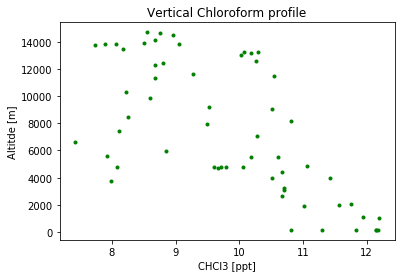

In [48]:
fig5()

### Create a histogram


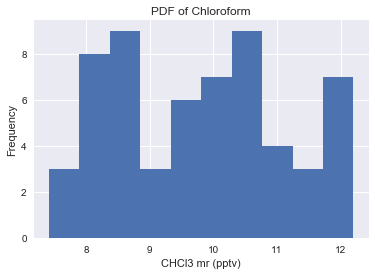

In [72]:
import matplotlib.cm as cm  # import the colormaps.
import plotly.plotly as py
fig,ax=plt.subplots(1,1)    # Create a result-shaped container (a fig)

CHCl3 = dataset.variables['CHCl3_Chloroform'][:]
Ozone = dataset.variables['O3_ppbv'][:]
plt.hist(CHCl3)
plt.title("PDF of Chloroform")
plt.xlabel("CHCl3 mr (pptv)")
plt.ylabel("Frequency")


fig = plt.gcf()


# # Make the 2D histogram with 100 bins
# (n,xx,yy,im)=ax.hist2d(x,y,bins=100,cmap=cm.Reds,cmin=0.,normed=True)

# # Plot it, with a colorbar
# plt.colorbar(im,shrink=0.5)
# ax.set_xlabel('x [units]'); ax.set_ylabel('y [units]')
# ax.set_title('Joint PDF of x and y')
# plt.show()

Text(0,0.5,'Frequency')

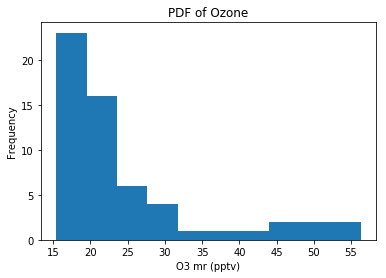

In [61]:
plt.hist(Ozone)
plt.title("PDF of Ozone")
plt.xlabel("O3 mr (pptv)")
plt.ylabel("Frequency")

C:\Users\Atlas\Anaconda3\envs\MPO624\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



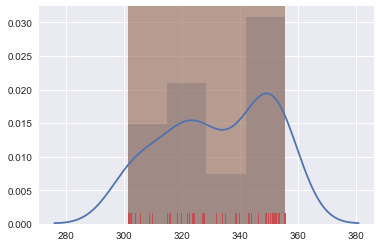

In [98]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

CHCl3 = dataset.variables['CHCl3_Chloroform'][:]
Ozone = dataset.variables['O3_ppbv'][:]
altitude = dataset.variables['GGALT'][:]
potential_T = dataset.variables['THETA'][:]

sns.distplot(potential_T)
sns.distplot(potential_T, kde=False, rug=True)
sns.distplot(potential_T, bins=10, kde=False, rug=True);





### Create a 2D histogram

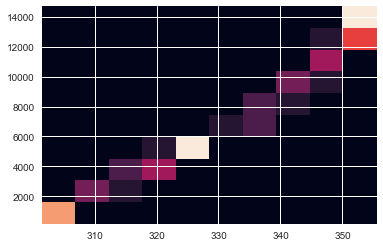

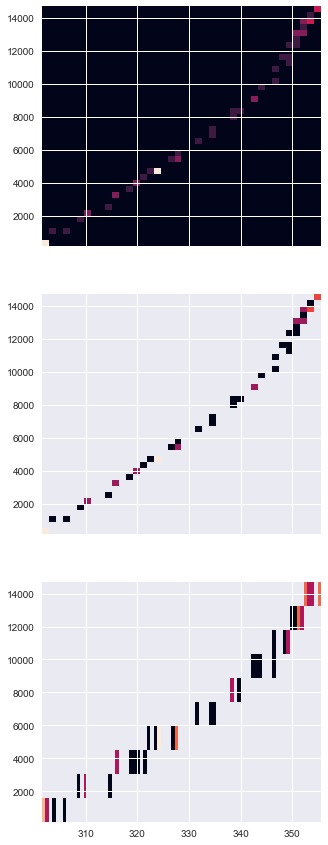

In [114]:
from matplotlib import colors

#Import data
CHCl3 = dataset.variables['CHCl3_Chloroform'][:]
Ozone = dataset.variables['O3_ppbv'][:]
altitude = dataset.variables['GGALT'][:]
potential_T = dataset.variables['THETA'][:]


#Create a 2D Histogram
fig, ax = plt.subplots()
hist = ax.hist2d(potential_T, altitude)


#Customize the 2D Histogram
fig, axs = plt.subplots(3, 1, figsize=(5, 15), sharex=True, sharey=True)

# We can increase the number of bins on each axis
axs[0].hist2d(potential_T, altitude, bins=40)

# As well as define normalization of the colors
axs[1].hist2d(potential_T, altitude, bins=40, norm=colors.LogNorm())

# We can also define custom numbers of bins for each axis
axs[2].hist2d(potential_T, altitude, bins=(80, 10), norm=colors.LogNorm())

plt.show()


### Create a joint distribution using seaborn

In [116]:
# Do it in Seaborn, with the marginal distributions on the top and side
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)


C:\Users\Atlas\Anaconda3\envs\MPO624\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



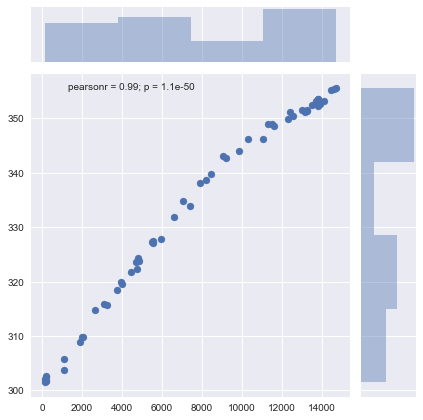

In [119]:
altitude = dataset.variables['GGALT'][:]
potential_T = dataset.variables['THETA'][:]

sns.jointplot(x=altitude, y=potential_T)

C:\Users\Atlas\Anaconda3\envs\MPO624\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



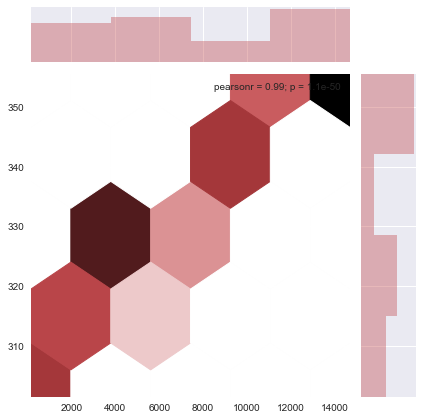

In [122]:
sns.jointplot(x=altitude, y=potential_T, kind="hex", color="r")

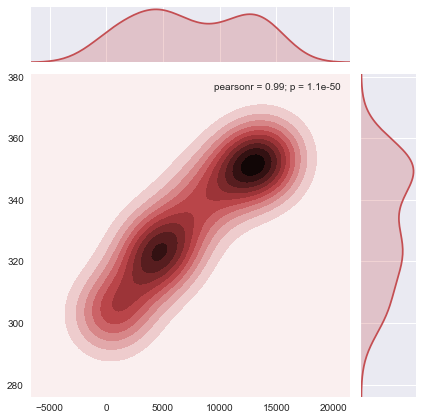

In [123]:
sns.jointplot(x=altitude, y=potential_T, kind="kde", color="r")

#### Big question: *How many bins?* 

There are many ways, but one rule of thumb is the **Freedman-Diaconis rule**. For this, you compute the Inter-Quartile-Range (IQR). 
If there are 1500 data points, you lay them out in ascending order... and take the 375th term (the one 25% of the way along)
and the 1125th term (the one 75% of the way along). This is the IQR. You also know N, the number of samples, which in this case in 1500. Now double it.

$BinSize = 2\frac{value(1125)-value(375)}{^{3}\sqrt{1500}}$

### When data are sparse, histograms are crude. 

(array([ 23.,  16.,   6.,   4.,   1.,   1.,   1.,   2.,   2.,   2.]),
 array([ 15.39869213,  19.48605642,  23.57342072,  27.66078501,
         31.7481493 ,  35.83551359,  39.92287788,  44.01024218,
         48.09760647,  52.18497076,  56.27233505]),
 <a list of 10 Patch objects>)

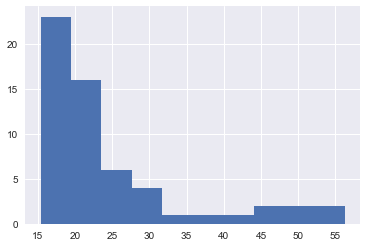

In [137]:
#Import data
CHCl3 = dataset.variables['CHCl3_Chloroform'][:]
Ozone = dataset.variables['O3_ppbv'][:]
altitude = dataset.variables['GGALT'][:]
potential_T = dataset.variables['THETA'][:]

#Plot the histogram of O3 mixing ratios
plt.hist(Ozone)

(array([ 21.,  12.,   6.,   5.,   5.,   1.,   0.,   0.,   2.,   0.,   1.,
          2.,   2.,   1.]),
 array([ 15.39869213,  18.31823805,  21.23778398,  24.1573299 ,
         27.07687582,  29.99642175,  32.91596767,  35.83551359,
         38.75505951,  41.67460544,  44.59415136,  47.51369728,
         50.43324321,  53.35278913,  56.27233505]),
 <a list of 14 Patch objects>)

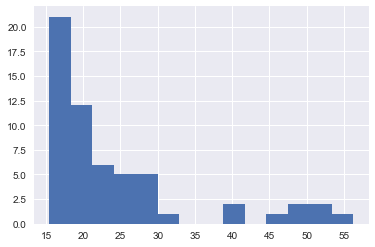

In [147]:
#Change the bin size to emphasize the bimodal distribution
plt.hist(Ozone, 14)